In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [3]:
df=pd.read_csv('/content/Student_Performance.csv')
print(df.head())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [4]:
print("Missing value\n",df.isnull().sum())
print("Summary\n",df.describe())

Missing value
 Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64
Summary
        Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                            2.867348          19.2125

In [9]:
x=df.drop('Performance Index',axis=1)
y=df['Performance Index']

In [10]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [11]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.2,random_state=42)

In [13]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [14]:
y_pred=model.predict(x_test)

In [16]:
r2=r2_score(y_test,y_pred)
rsme=np.sqrt(mean_squared_error(y_test,y_pred))
print("R@2 Score:",r2)
print("RSME:",rsme)

R@2 Score: 0.9889832909573145
RSME: 2.020551508505005


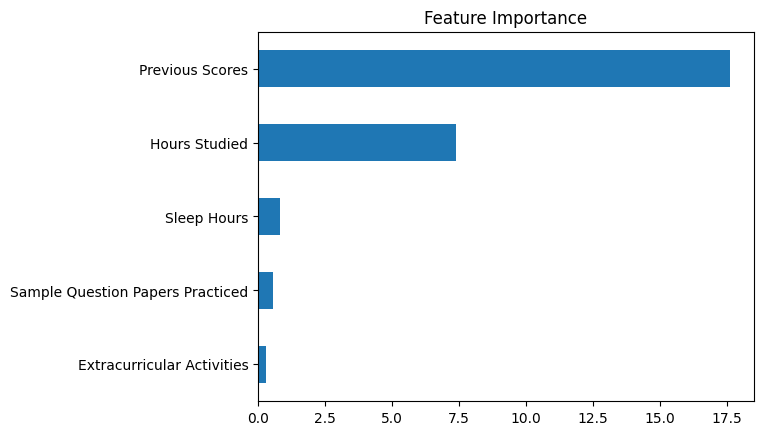

In [18]:
feature_importance = pd.Series(model.coef_, index=df.drop('Performance Index', axis=1).columns)
feature_importance.sort_values().plot(kind='barh', title='Feature Importance')
plt.show()